# Tel Aviv Stock Exchange
* Scrape historical data

In [1]:
import pandas as pd
import numpy as np
import time
import os
import shutil

from selenium import webdriver

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#params
data_dir = '/home/void/Downloads/'
file_history = data_dir + 'securityHistoryInDayData.csv'

In [3]:
def clean_history():
    '''
    removes tmp downloaded file
    '''
    
    if os.path.exists(file_history):
        os.remove(file_history)    

# Static
* Defined dict of symbols

In [4]:
#symbol to tick
symbols = {
    #TA-35
    'HRL.TA-35' : 1, #Harel Sal (4A) TA 35
    'KSM.TA-35' : 10, #KSM ETF (4A) TA-35
    'MTF.TA-35' : 1, #MTF SAL (4A) TA-35
    'PSG.TA-35' : 1, #Psagot ETF (4A) TA-35
    'TC.TA35' : 1, #Tachlit SAL (40) TA 35
    
    #TA-125
    'TC.TA125' : 1, #Tachlit SAL (40) TA 125
    'KSM.TA-125' : 10, #KSM ETF (4A) TA-125
    'PSG.TA-125' : 1, #Psagot ETF (4A) TA-125
    'HRL.TA-125' : 1, #Harel Sal (4A) TA 125M
    'MTF.TA-125' : 1, #MTF SAL (4A) TA-125
    
    #stocks
    'TEVA' : 1,
    'NICE' : 10,
    'ICL' : 1,
    'ESLT' : 10,
    'PRGO' : 10
}

#symbol to url
urls = {
    #TA-35    
    'HRL.TA-35' : 'https://www.tase.co.il/en/market_data/etf/1148907/historical_data/inday',
    'KSM.TA-35' : 'https://www.tase.co.il/en/market_data/etf/1146570/historical_data/inday',
    'MTF.TA-35' : 'https://www.tase.co.il/en/market_data/etf/1150184/historical_data/inday',
    'PSG.TA-35' : 'https://www.tase.co.il/en/market_data/etf/1148790/historical_data/inday',
    'TC.TA35' : 'https://www.tase.co.il/en/market_data/etf/1143700/historical_data/inday',
    
    #TA-125
    'TC.TA125' : 'https://www.tase.co.il/en/market_data/etf/1143718/historical_data/inday',
    'KSM.TA-125' : 'https://www.tase.co.il/en/market_data/etf/1146356/historical_data/inday',
    'PSG.TA-125' : 'https://www.tase.co.il/en/market_data/etf/1148808/historical_data/inday',
    'HRL.TA-125' : 'https://www.tase.co.il/en/market_data/etf/1148899/historical_data/inday',
    'MTF.TA-125' : 'https://www.tase.co.il/en/market_data/etf/1150283/historical_data/inday',
    
    #stocks
    'TEVA' : 'https://www.tase.co.il/en/market_data/security/00629014/historical_data/inday',
    'NICE' : 'https://www.tase.co.il/en/market_data/security/00273011/historical_data/inday',
    'ICL' : 'https://www.tase.co.il/en/market_data/security/00281014/historical_data/inday',
    'ESLT' : 'https://www.tase.co.il/en/market_data/security/01081124/historical_data/inday',
    'PRGO' : 'https://www.tase.co.il/en/market_data/security/01130699/historical_data/inday'
}

In [5]:
#init
driver = webdriver.Chrome()
driver.minimize_window()

#run flow
for symbol, tick in symbols.items():
    retry = 3
    done = False
    
    while(not done and retry > 0):
        try:
            retry -= 1
            url = urls[symbol]
            print(symbol, tick, url)

            #clean
            clean_history()

            #request
            driver.get(url)
            time.sleep(5)

            #Download data
            driver.find_elements_by_class_name('icon-download')[0].click()

            #CSV
            driver.find_elements_by_xpath("//a[contains(text(),'CSV')]")[0].click()
            time.sleep(5)

            #clone
            shutil.copyfile(file_history, data_dir + symbol + '.csv')            
            
            #done
            done = True
        except Exception as e:
            print(symbol, 'retry', retry, e)
        
#clean
clean_history()

#terminate
driver.quit()

HRL.TA-35 1 https://www.tase.co.il/en/market_data/etf/1148907/historical_data/inday
HRL.TA-35 retry 2 [Errno 2] No such file or directory: '/home/void/Downloads/securityHistoryInDayData.csv'
HRL.TA-35 1 https://www.tase.co.il/en/market_data/etf/1148907/historical_data/inday
HRL.TA-35 retry 1 [Errno 2] No such file or directory: '/home/void/Downloads/securityHistoryInDayData.csv'
HRL.TA-35 1 https://www.tase.co.il/en/market_data/etf/1148907/historical_data/inday
KSM.TA-35 10 https://www.tase.co.il/en/market_data/etf/1146570/historical_data/inday
MTF.TA-35 1 https://www.tase.co.il/en/market_data/etf/1150184/historical_data/inday
PSG.TA-35 1 https://www.tase.co.il/en/market_data/etf/1148790/historical_data/inday
TC.TA35 1 https://www.tase.co.il/en/market_data/etf/1143700/historical_data/inday
TC.TA125 1 https://www.tase.co.il/en/market_data/etf/1143718/historical_data/inday
KSM.TA-125 10 https://www.tase.co.il/en/market_data/etf/1146356/historical_data/inday
PSG.TA-125 1 https://www.tase.

# Dynamic
* Top-k by turnover

In [6]:
k = 5
data = []

#init
driver = webdriver.Chrome()
driver.minimize_window()

## Stocks

In [7]:
#load
url = 'https://info.tase.co.il/eng/marketdata/stocks/marketdata/Pages/MarketData.aspx'
driver.get(url)
time.sleep(5)

#sort
driver.find_element_by_id('OverallTurnOverValue DESC').click()
time.sleep(5)

#top-k
elements = driver.find_elements_by_xpath('//td[@class="DataGridItemReg"]//a[@class="linkInGrid"]')[:k]

In [8]:
#collect raw data
for e in elements:
    symbol = e.text
    href = e.get_attribute('href')
    data_href = 'https://www.tase.co.il/en/market_data/security/' + href.split('/')[-1] + '/historical_data/inday'
    print(symbol, data_href)
    data.append([symbol, href, data_href])

TEVA https://www.tase.co.il/en/market_data/security/00629014/historical_data/inday
POALIM https://www.tase.co.il/en/market_data/security/00662577/historical_data/inday
NICE https://www.tase.co.il/en/market_data/security/00273011/historical_data/inday
LEUMI https://www.tase.co.il/en/market_data/security/00604611/historical_data/inday
MIZRAHI TEFAHOT https://www.tase.co.il/en/market_data/security/00695437/historical_data/inday


## ETF

In [9]:
#load
url = 'https://www.tase.co.il/en/market_data/etfs'
driver.get(url)
time.sleep(5)

#sort
driver.find_elements_by_xpath('//button[@aria-label="Sort descending by Turnover (NIS thousands) "]')[0].click()
time.sleep(5)

#top-k
elements = driver.find_elements_by_xpath('//a[@class="item-name"]')[:k]

In [10]:
#collect raw data
for e in elements:
    symbol = e.text
    href = e.get_attribute('href')
    data_href = 'https://www.tase.co.il/en/market_data/security/' + href.split('/')[-1] + '/historical_data/inday'
    print(symbol, data_href)
    data.append([symbol, href, data_href])

Harel Sal (4A) TA-Banks5 https://www.tase.co.il/en/market_data/security/1148949/historical_data/inday
Tachlit SAL (40) TA 125 https://www.tase.co.il/en/market_data/security/1143718/historical_data/inday
Tachlit SAL (00) Tel Bond 20 https://www.tase.co.il/en/market_data/security/1143791/historical_data/inday
Tachlit SAL (40) TA 35 https://www.tase.co.il/en/market_data/security/1143700/historical_data/inday
Tachlit SAL (4D) S&P 500 https://www.tase.co.il/en/market_data/security/1144385/historical_data/inday


## Run Flow

In [11]:
#run flow
for d in data:
    retry = 3
    done = False
    
    while(not done and retry > 0):
        try:    
            retry -= 1
            symbol = d[0]
            href = d[1]
            data_href = d[2]
            print(symbol, data_href)

            #clean
            clean_history()

            #go to data
            driver.get(data_href)
            time.sleep(5)

            #Download data
            driver.find_elements_by_class_name('icon-download')[0].click()

            #CSV
            driver.find_elements_by_xpath("//a[contains(text(),'CSV')]")[0].click()
            time.sleep(5)

            #clone
            shutil.copyfile(file_history, data_dir + symbol + '.csv')
            
            #done
            done = True            
        except Exception as e:
            print(symbol, 'retry', retry, e)            
            
#clean
clean_history()

#terminate
driver.quit()

TEVA https://www.tase.co.il/en/market_data/security/00629014/historical_data/inday
POALIM https://www.tase.co.il/en/market_data/security/00662577/historical_data/inday
NICE https://www.tase.co.il/en/market_data/security/00273011/historical_data/inday
LEUMI https://www.tase.co.il/en/market_data/security/00604611/historical_data/inday
MIZRAHI TEFAHOT https://www.tase.co.il/en/market_data/security/00695437/historical_data/inday
Harel Sal (4A) TA-Banks5 https://www.tase.co.il/en/market_data/security/1148949/historical_data/inday
Tachlit SAL (40) TA 125 https://www.tase.co.il/en/market_data/security/1143718/historical_data/inday
Tachlit SAL (00) Tel Bond 20 https://www.tase.co.il/en/market_data/security/1143791/historical_data/inday
Tachlit SAL (40) TA 35 https://www.tase.co.il/en/market_data/security/1143700/historical_data/inday
Tachlit SAL (4D) S&P 500 https://www.tase.co.il/en/market_data/security/1144385/historical_data/inday
Tachlit SAL (4D) S&P 500 retry 2 list index out of range
Tac

# Zoom In

In [12]:
def load_data(symbol):
    df = pd.read_csv(data_dir + symbol + '.csv', skiprows=2).dropna()
    df['Time'] = pd.to_datetime(df['Time'])
    df = df.sort_values(by='Time').reset_index().drop(['index'], axis=1)
    return df

In [13]:
df = load_data('TEVA')
df.head()

,Time,Last Rate,Change (%),Volume,Turnover(NIS),Cumulative Turnover (NIS)
0,2020-05-08 09:59:00,3696.0,5.00,118490.0,4379390.40,4379390.0
1,2020-05-08 09:59:00,3691.0,4.86,500.0,18455.00,4611179.0
2,2020-05-08 09:59:00,3691.0,4.86,1000.0,36910.00,4592724.0
3,2020-05-08 09:59:00,3691.0,4.86,900.0,33219.00,4555814.0
4,2020-05-08 09:59:00,3691.0,4.86,566.0,20891.06,4522595.0


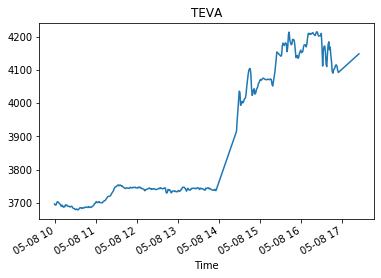

In [14]:
df.groupby('Time').mean()['Last Rate'].plot(title='TEVA')